# pypdb advanced demos

This is a set of basic examples of the ways that algorithmic querying with PyPDB can be used to perform advanced search tasks. Most of these examples combine multiple functions in the API in order to perform searches based on the results of previous searches

### Preamble

In [57]:
%pylab inline
from IPython.display import HTML

from pypdb_TEMP import *

import pprint

# from pypdb import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [1]:
%pylab inline
from IPython.display import HTML

# from pypdb.pypdb import *

import pprint

from pypdb import *

Populating the interactive namespace from numpy and matplotlib


ImportError: No module named 'pypdb'

In [1]:
%pylab inline
from IPython.display import HTML

from pypdb.pypdb import *

import pprint

Populating the interactive namespace from numpy and matplotlib


ImportError: No module named 'pypdb.pypdb'; 'pypdb' is not a package

In [78]:
result_gen = find_results_gen('bleb')
pprint.pprint([item for item in result_gen][:5])

['MYOSIN II DICTYOSTELIUM DISCOIDEUM MOTOR DOMAIN S456Y BOUND WITH MGADP-BEFX',
 'MYOSIN II DICTYOSTELIUM DISCOIDEUM MOTOR DOMAIN S456Y BOUND WITH MGADP-ALF4',
 'DICTYOSTELIUM DISCOIDEUM MYOSIN II MOTOR DOMAIN S456E WITH BOUND MGADP-BEFX',
 'MYOSIN II DICTYOSTELIUM DISCOIDEUM MOTOR DOMAIN S456E BOUND WITH MGADP-ALF4',
 'The structural basis of blebbistatin inhibition and specificity for myosin '
 'II']


In [86]:
crispr_query = make_query('crispr')
crispr_results = do_search(crispr_query)

In [90]:
print(list_types(crispr_results[:5]))

['protein', 'protein', 'protein', 'protein', 'protein']


### Look up structural information about the results of a BLAST search

In [70]:
# Search for PDB IDs related to CRISPR
crispr_query = make_query('crispr')
crispr_results = do_search(crispr_query)

# Run BLAST on the top result
top_result = crispr_results[0]
blast_hits = get_blast2(top_result)


for item in blast_hits[0]:
    pdbdesc = describe_pdb(item)
    print(pdbdesc['title'])

Structure of Thermus Thermophilus Cse3 bound to an RNA representing a product complex
Structure of Thermus Thermophilus Cse3 bound to an RNA representing a pre-cleavage complex
Structure of Thermus Thermophilus Cse3 bound to an RNA representing a product mimic complex
STRUCTURE A OF CRISPR ENDORIBONUCLEASE CSE3 BOUND TO 19 NT RNA
STRUCTURE B OF CRISPR ENDORIBONUCLEASE CSE3 BOUND TO 19 NT RNA
STRUCTURE OF CRISPR ENDORIBONUCLEASE CSE3 BOUND TO 20 NT RNA
Crystal structure of a CRISPR-associated protein from thermus thermophilus
Crystal structure of the E. coli CRISPR RNA-guided surveillance complex, Cascade
Crystal structure of a CRISPR RNA-guided surveillance complex, Cascade, bound to a ssDNA target
Crystal structure of RNA-guided immune Cascade complex from E.coli
Crystal structure of the CRISPR-associated protein Cas6e from Escherichia coli str. K-12


### Estimate total number of depositions versus time

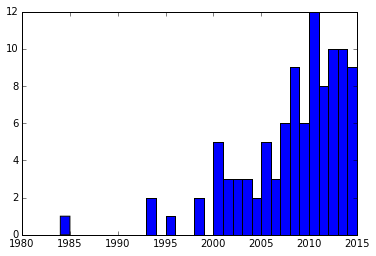

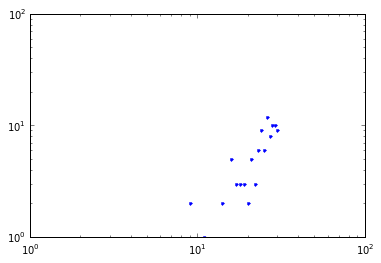

In [4]:
# Choose a random sample because we don't want to call the database for every single entry
from random import choice

all_pdbs = get_all()

all_dates = list()

for ii in range(100):
    pdb_desc = describe_pdb( choice(all_pdbs) )
    depdate = (pdb_desc['deposition_date'])
    all_dates.append( int(depdate[:4]) )
    
all_dates = array(all_dates)

figure()
subs_v_time = hist(all_dates, max(all_dates)-min(all_dates))
show(subs_v_time)   

# Show power-law scaling
figure()
subs_v_time_loglog = loglog(subs_v_time[0],'.')
show(subs_v_time_loglog)

### Graph new CRISPR entries versus time

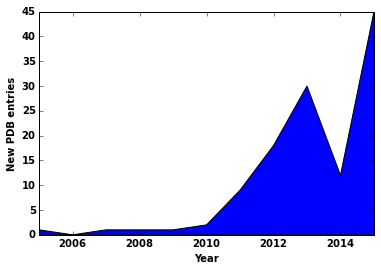

In [54]:
# Perform search
all_dates = find_dates('crispr', max_results=500)
all_dates = array(all_dates)
all_dates = array([int(depdate[:4]) for depdate in all_dates])
subs_v_time = histogram(all_dates, max(all_dates)-min(all_dates))
dates, num_entries = subs_v_time[1][1:], subs_v_time[0]
popgraph = fill_between(dates, 0, num_entries)

# Formatting the plots
xlim([dates[0], dates[-1]] )
gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))
xticks(fontweight='bold')
yticks(fontweight='bold')
xlabel('Year',fontweight='bold')
ylabel('New PDB entries',fontweight='bold')
show(popgraph)

### Sweep RMSD matching parameters

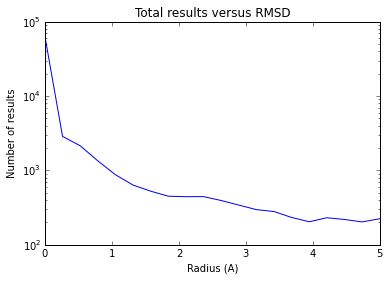

In [15]:
point_group = 'C1'
max_distance = 5.0
npts = 20

dist_vals = linspace(0.0, max_distance, npts)
dx = dist_vals[1]-dist_vals[0]

all_ids = []

for dist_val in dist_vals:
    idlist = do_protsym_search(point_group, min_rmsd=dist_val, max_rmsd=(dist_val+dx))
    all_ids.append(idlist)
    
counts = array([len(item) for item in all_ids])
show(semilogy(dist_vals, counts))
title('Total results versus RMSD')
xlabel('Radius (A)')
ylabel('Number of results')

## Find all associated organisms and
## structure types for the results of a BLAST search

In [56]:
# Search for PDB IDs related to CRISPR
crispr_query = make_query('swim')
crispr_results = do_search(crispr_query)

# Run BLAST on the top result
top_result = crispr_results[0]
blast_hits = get_blast2(top_result)

# Print list of associated taxa
pprint.pprint(list_taxa(blast_hits[0][:5]))
pprint.pprint(list_types(blast_hits[0][:5]))

['Thunnus thynnus',
 'Thunnus thynnus',
 'Thunnus thynnus',
 'Trematomus bernacchii',
 'Trematomus bernacchii']
['protein', 'protein', 'protein', 'protein', 'protein']
